In [1]:
import os, warnings
# 경고 메시지 무시하거나 숨길때(ignore), 다시보이게(default)
# warnings.filterwarnings(action='default')
warnings.filterwarnings(action='ignore')

In [2]:
# 한글
import matplotlib
from matplotlib import font_manager, rc
font_loc = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn


In [4]:
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3,3, 1000, endpoint=False).reshape(-1,1)

print(X.shape)
print(y.shape)


(100, 1)
(100,)


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

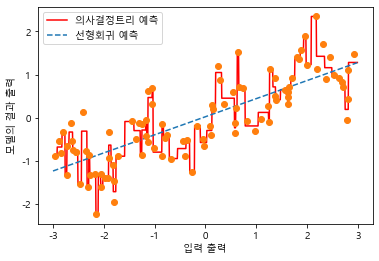

In [6]:
# 모델을 선택 및 학습 
linear = LinearRegression().fit(X, y)
decision = DecisionTreeRegressor(min_samples_split=3).fit(X, y)

# 실선으로 -3~3까지의 값을 데이터로 넣어 의사 결정트리 모델 예측
plt.plot(line, decision.predict(line), 'r-', label='의사결정트리 예측')

# 점선으로 -3~3까지의 값을 데이터로 넣어 회귀 모델 예측
plt.plot(line, linear.predict(line), '--', label='선형회귀 예측')

# 모델을 만들었던 데이터 찍겠다.
plt.plot(X[:, 0], y, 'o')

plt.ylabel("모델의 결과 출력")
plt.xlabel("입력 출력")
plt.legend(loc="best")

In [7]:
bins = np.linspace(-3, 3, 11)
print("구간: {}".format(bins))

구간: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


## 구간 나누기

In [8]:
from sklearn.preprocessing import KBinsDiscretizer

In [9]:
kb = KBinsDiscretizer(n_bins=10, strategy="uniform")
kb.fit(X)
print("bin edges : \n", kb.bin_edges_ )

bin edges : 
 [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
       -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
        2.92132162])]


In [11]:
len(kb.bin_edges_[0])

11

In [13]:
X_binned = kb.transform(X)
X_binned

<100x10 sparse matrix of type '<class 'numpy.float64'>'
	with 100 stored elements in Compressed Sparse Row format>

In [14]:
print(X[:10])
X_binned[0:10].toarray()

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [15]:
line_binned = kb.transform(line)
line_binned.toarray()


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

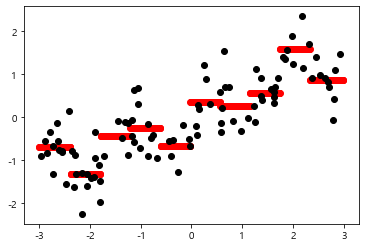

In [20]:
reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), 'ro',
        label = "구간 선형 회귀")

plt.plot(X[:, 0], y, 'o', c = 'k')

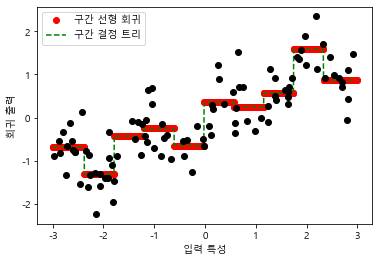

In [21]:
reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), 'ro', 
         label="구간 선형 회귀")   # 점

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), 'g--', label="구간 결정 트리")  # 점선

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")


### 원본 특성 곱하여 선형 회귀 모델 표현

In [25]:
print(X.shape)
print(X_binned.shape)

(100, 1)
(100, 10)


In [26]:
np.min(line), np.max(line), line.shape

(-3.0, 2.9939999999999998, (1000, 1))

In [27]:
X.shape, X_binned.shape

((100, 1), (100, 10))

In [28]:
# 원본 데이터와 구간화된 데이터 결합
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)
X_combined[0:3]

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

## 비선형 변환

In [29]:
# 한글
import matplotlib
from matplotlib import font_manager, rc
font_loc = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False

In [30]:
####
import numpy as np
import matplotlib.pyplot as plt

In [31]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000,3))

# np.random.normal() : 정규분포를 따르는 임의의 값을 가져오겠다.
# np.random.uniform() : 균등 분포를 따르는 임의의 값을 가져오겠다.
print(X_org.shape)

w = rnd.normal(size=3)
print(w.shape)


(1000, 3)
(3,)


#### 푸아송 분포 : 로그 변환을 통해서 정규분포화 시킴

In [32]:
X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)
print(X[:10, 0])
print(X[:10, 1])

[ 56  81  25  20  27  18  12  21 109   7]
[18 57  9 13 13 46  3 20  1 55]


Text(0.5, 0, '값')

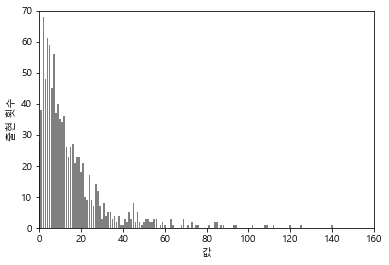

In [33]:
plt.xlim(0, 160)
plt.ylim(0, 70)
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")

In [34]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [38]:
model = Ridge().fit(X_train, y_train)

score_tr = model.score(X_train, y_train)
score_test = model.score(X_test, y_test)

score_tr, score_test

(0.6562611944454686, 0.6224186236310756)

In [39]:
X_train_log = np.log(X_train +1 )
X_test_log = np.log(X_test + 1)

(array([[829., 120.,  33.,  11.,   5.,   2.,   0.,   0.,   0.,   0.],
        [820., 127.,  31.,  13.,   2.,   5.,   0.,   1.,   0.,   1.],
        [824., 126.,  32.,  12.,   4.,   1.,   0.,   0.,   1.,   0.]]),
 array([  0. ,  24.8,  49.6,  74.4,  99.2, 124. , 148.8, 173.6, 198.4,
        223.2, 248. ]),
 <a list of 3 Lists of Patches objects>)

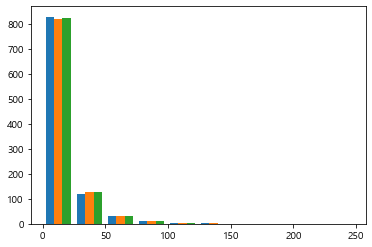

In [40]:
plt.hist(X)

(array([[ 19.,  31., 134., 111., 161., 169.,  69.,  42.,  14.,   0.],
        [ 13.,  53., 139., 119., 159., 141.,  75.,  37.,   9.,   5.],
        [ 10.,  39., 140., 118., 168., 141.,  85.,  35.,  12.,   2.]]),
 array([0.        , 0.53752784, 1.07505568, 1.61258352, 2.15011136,
        2.6876392 , 3.22516704, 3.76269489, 4.30022273, 4.83775057,
        5.37527841]),
 <a list of 3 Lists of Patches objects>)

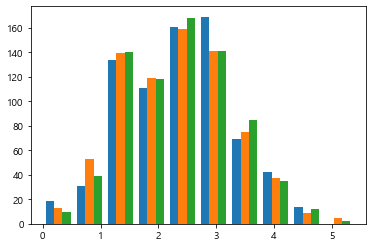

In [41]:
plt.hist(X_train_log)

(array([[ 9., 19., 31., 57., 42., 51., 25., 13.,  3.,  0.],
        [ 4., 25., 24., 53., 42., 55., 27., 14.,  5.,  1.],
        [ 5., 23., 34., 60., 49., 45., 19., 13.,  2.,  0.]]),
 array([0.        , 0.55174529, 1.10349058, 1.65523587, 2.20698116,
        2.75872645, 3.31047174, 3.86221703, 4.41396232, 4.96570761,
        5.5174529 ]),
 <a list of 3 Lists of Patches objects>)

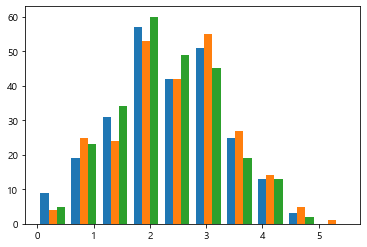

In [42]:
plt.hist(X_test_log)

In [43]:
model = Ridge().fit(X_train_log, y_train)

score_tr = model.score(X_train_log, y_train)
score_test = model.score(X_test_log, y_test)

score_tr, score_test

(0.8627504186195984, 0.8749342372887816)